In [1]:
%matplotlib inline

In [57]:
import sys
import os
from os.path import join
from pathlib import Path
sys.path.append(join(Path(os.getcwd()).parent, 'lib'))
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (4,4)

In [48]:
def plotar(batch):  
    for n,c in enumerate(batch):
        ax, s = plt.subplots()
        title = deg(mm[c].rolling(window=100).mean())     
        mm[c].plot(title=str(c)+'_'+str(title))
        mm[c].rolling(window=100).mean().plot()

In [8]:
def div_batch(x, n_batches):
    l=[]
    batch_size = int(len(x)/n_batches)
    for i in range(0, n_batches*batch_size, batch_size):
        l.append(x[i:i+batch_size])
    l.append(x[(batch_size*n_batches-1):])
    return l

In [47]:
def ps(x):
    return pd.Series(x)

In [5]:
with open('../../info/info-LIGHT.json','rt') as p:
    data = json.load(p)

In [6]:
mm_path = data['paths']['mm']['input']
mm = pd.read_csv(mm_path, sep=';', index_col = 0, parse_dates=[0])
mm.fillna(value=0, inplace=True)
l = div_batch(mm.columns, 60)

------

In [149]:
def deg(x):
    _1 = x[:int(len(x)/2)].mean()
    _2 = x[int(len(x)/2):].mean()
    
    a = 1 if  _1*factor > _2 else 0
    return a, _1, _2, _2/(_1+0.0001)

In [74]:
global factor
factor = 0.8

In [128]:
def plotar2(cols, n):  
    for i in range(n):
        v = int(np.random.sample() * len(cols) )
        ax, s = plt.subplots()
        title = deg(mm[cols[v]].rolling(window=500).mean())     
        mm[cols[v]].plot(title=str(cols[v])+'_'+str(title))
        mm[cols[v]].rolling(window=100).mean().plot()

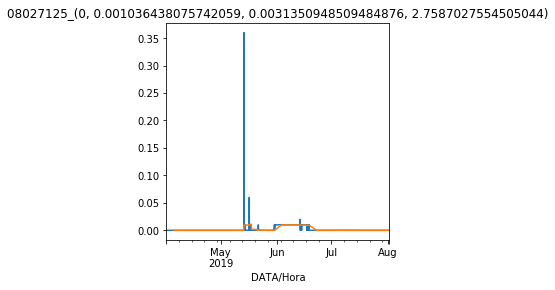

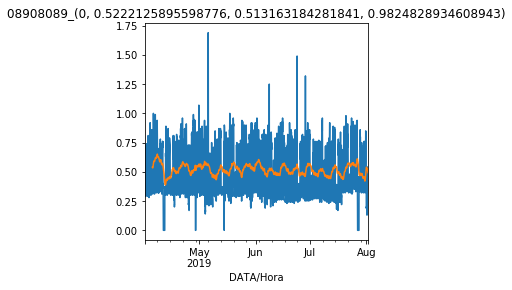

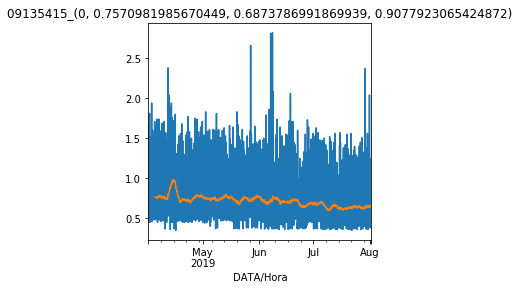

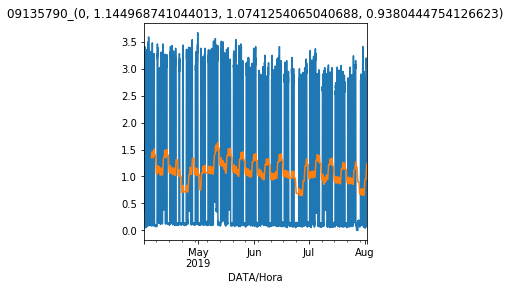

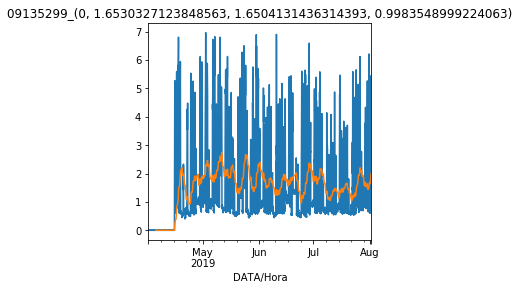

In [150]:
a=plotar2(mm.columns, 5)